<a href="https://colab.research.google.com/github/jordan-dsouza/OIBSIP/blob/main/Car_Price_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [293]:
#Importing libraries:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
sns.set()

In [166]:
#Loading the dataset:
df = pd.read_csv("CarPrice_Assignment.csv")
#Display the dataset:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#Column names:
df.columns.values

array(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'], dtype=object)

In [71]:
#Describing dataset:
df.describe(include="all")

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,range
count,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,...,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205
unique,NaN,147,2,2,2,5,3,2,NaN,NaN,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,NaN,...,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,budget
freq,NaN,6,185,168,115,96,120,202,NaN,NaN,...,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,...,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,...,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,...,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,...,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,...,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,...,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,NaN


In [141]:
df.drop("car_ID", axis = 1, inplace = True)

In [ ]:
#Dataset values:
df.info()

In [142]:
Company = df["CarName"].apply(lambda x : x.split(' ')[0])
df.insert(3,"Company",Company)
df.drop(["CarName"],axis=1,inplace=True)
df.head()

,symboling,fueltype,Company,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#**EDA:**

<ipython-input-77-3534e1c1fca9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


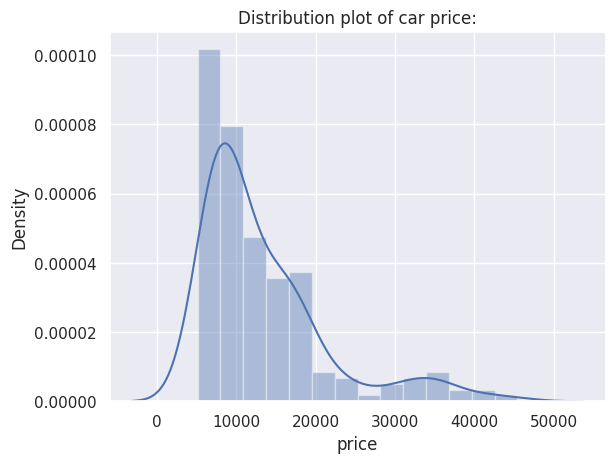

In [77]:
#Price distribution:
plt.title("Distribution plot of car price:")
sns.distplot(df.price)
plt.show()

In [78]:
df.price.describe(include = "all")

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [79]:
print("Median:", np.median(df.price))
print("Mode:", round(np.mean(df.price),2))

Median: 10295.0
Mode: 13276.71


1. Plot is right skewed.
2. Mean price is 13276.
3. Large difference between median and mean.
4. Variance is high as datapoints are spread out.

#**EDA categorical data:**

In [81]:
#Categorical data:
catg = df.select_dtypes(include=['object']).columns.tolist()
print(catg)

['fueltype', 'Company', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


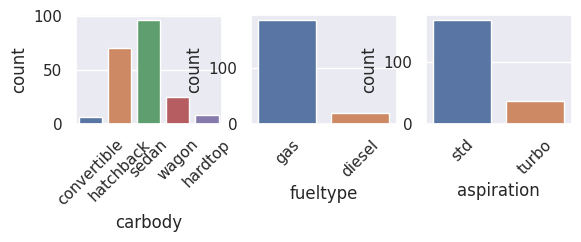

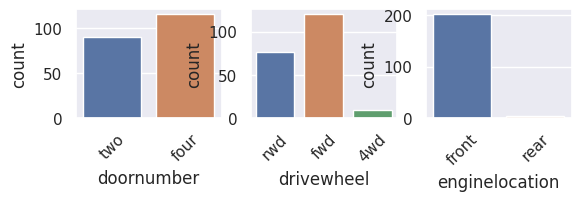

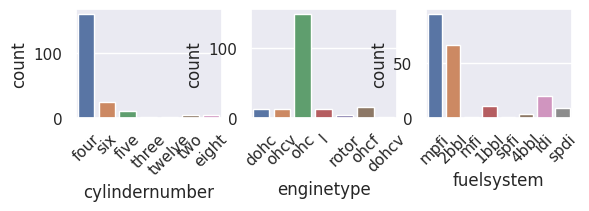

In [82]:
plt.subplot(3,3,1)
sns.countplot(x = "carbody", data = df)
plt.xticks(rotation = 45)

plt.subplot(3,3,2)
sns.countplot(x = "fueltype", data = df)
plt.xticks(rotation = 45)

plt.subplot(3,3,3)
sns.countplot(x = "aspiration", data = df)
plt.xticks(rotation = 45)
plt.show()

plt.subplot(3,3,4)
sns.countplot(x = "doornumber", data = df)
plt.xticks(rotation = 45)

plt.subplot(3,3,5)
sns.countplot(x = "drivewheel", data = df)
plt.xticks(rotation = 45)

plt.subplot(3,3,6)
sns.countplot(x = "enginelocation", data = df)
plt.xticks(rotation = 45)
plt.show()

plt.subplot(3,3,7)
sns.countplot(x = "cylindernumber", data = df)
plt.xticks(rotation = 45)

plt.subplot(3,3,8)
sns.countplot(x = "enginetype", data = df)
plt.xticks(rotation = 45)

plt.subplot(3,3,9)
sns.countplot(x = "fuelsystem", data = df)
plt.xticks(rotation = 45)
plt.show()

1. Most cars have 4 cylinders.
2. Most cars use gas.
3. Most sold cars are sedans.
4. Most are FWD.
5. Many cars have four doors.
6. Most engine type is "OHC".

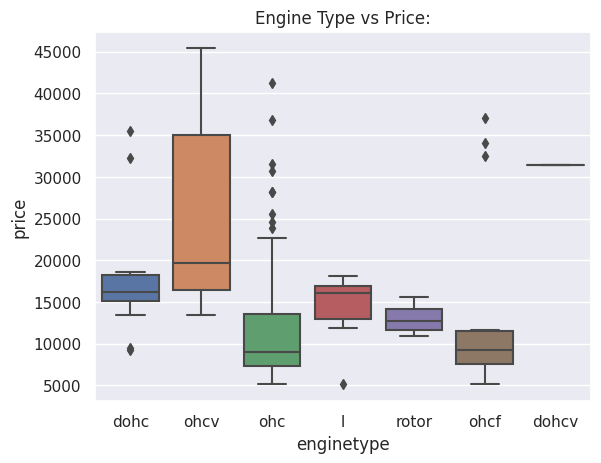

In [83]:
plt.title("Engine Type vs Price:")
sns.boxplot(x=df.enginetype, y=df.price)
plt.show()

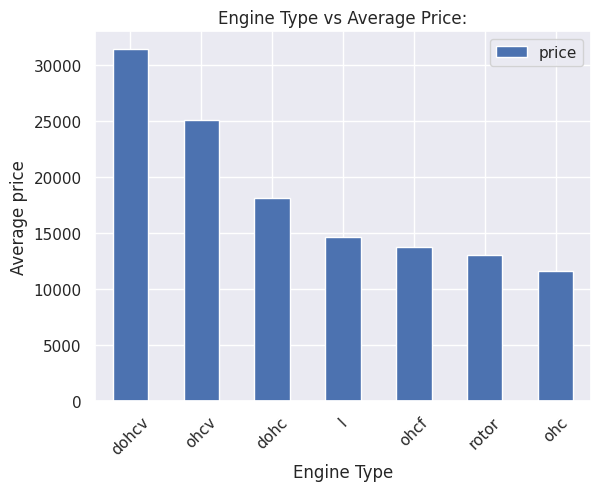

In [84]:
a = pd.DataFrame(df.groupby(["enginetype"])["price"].mean().sort_values(ascending = False))
a.plot.bar()
plt.title("Engine Type vs Average Price:")
plt.xlabel("Engine Type")
plt.ylabel("Average price")
plt.xticks(rotation = 45)
plt.show()

1. OHCV has highest price range.
2. DOHCV has highest average price.

<Figure size 200x500 with 0 Axes>

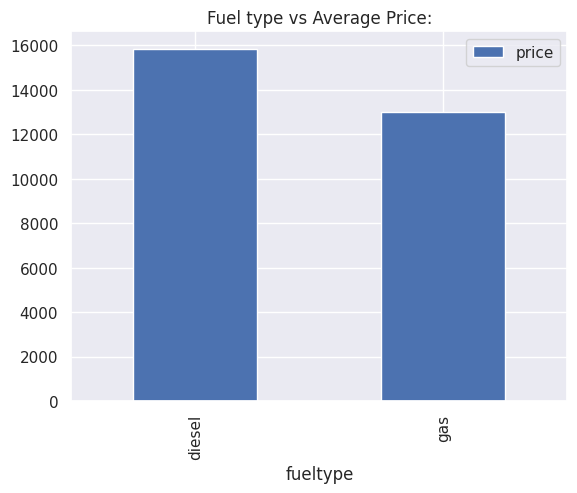

In [85]:
plt.figure(figsize = (2,5))
b = pd.DataFrame(df.groupby(["fueltype"])["price"].mean().sort_values(ascending = False))
b.plot.bar()
plt.title("Fuel type vs Average Price:")
plt.show()

Diesel costs more than gas.

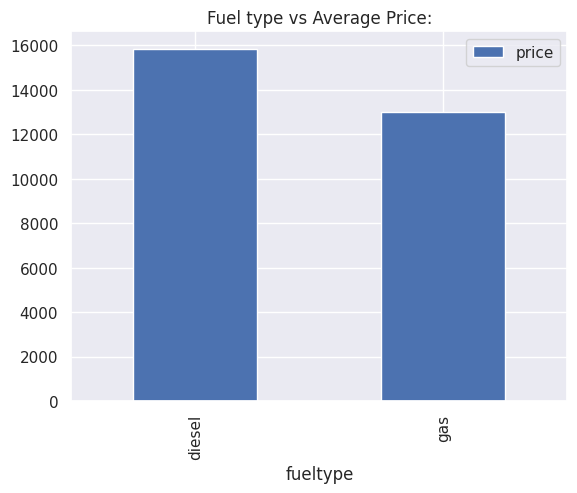

In [86]:
b = pd.DataFrame(df.groupby(["fueltype"])["price"].mean().sort_values(ascending = False))
b.plot.bar()
plt.title("Fuel type vs Average Price:")
plt.show()

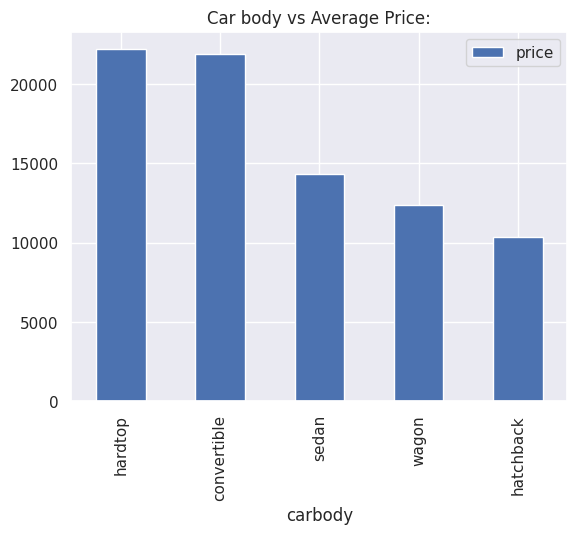

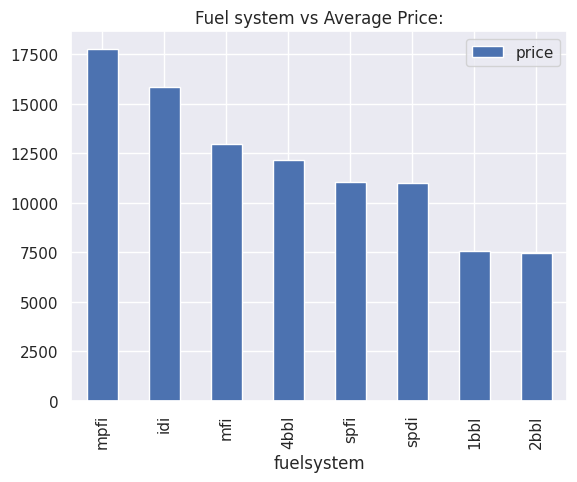

<Figure size 640x480 with 0 Axes>

In [87]:
c = pd.DataFrame(df.groupby(["carbody"])["price"].mean().sort_values(ascending = False))
c.plot.bar()
plt.title("Car body vs Average Price:")
plt.show()
d = pd.DataFrame(df.groupby(["fuelsystem"])["price"].mean().sort_values(ascending = False))
d.plot.bar()
plt.title("Fuel system vs Average Price:")
plt.show()

plt.tight_layout()

1. Hardtop and convertible have the highest average price.
2. MPFI fuel system has highest average price.

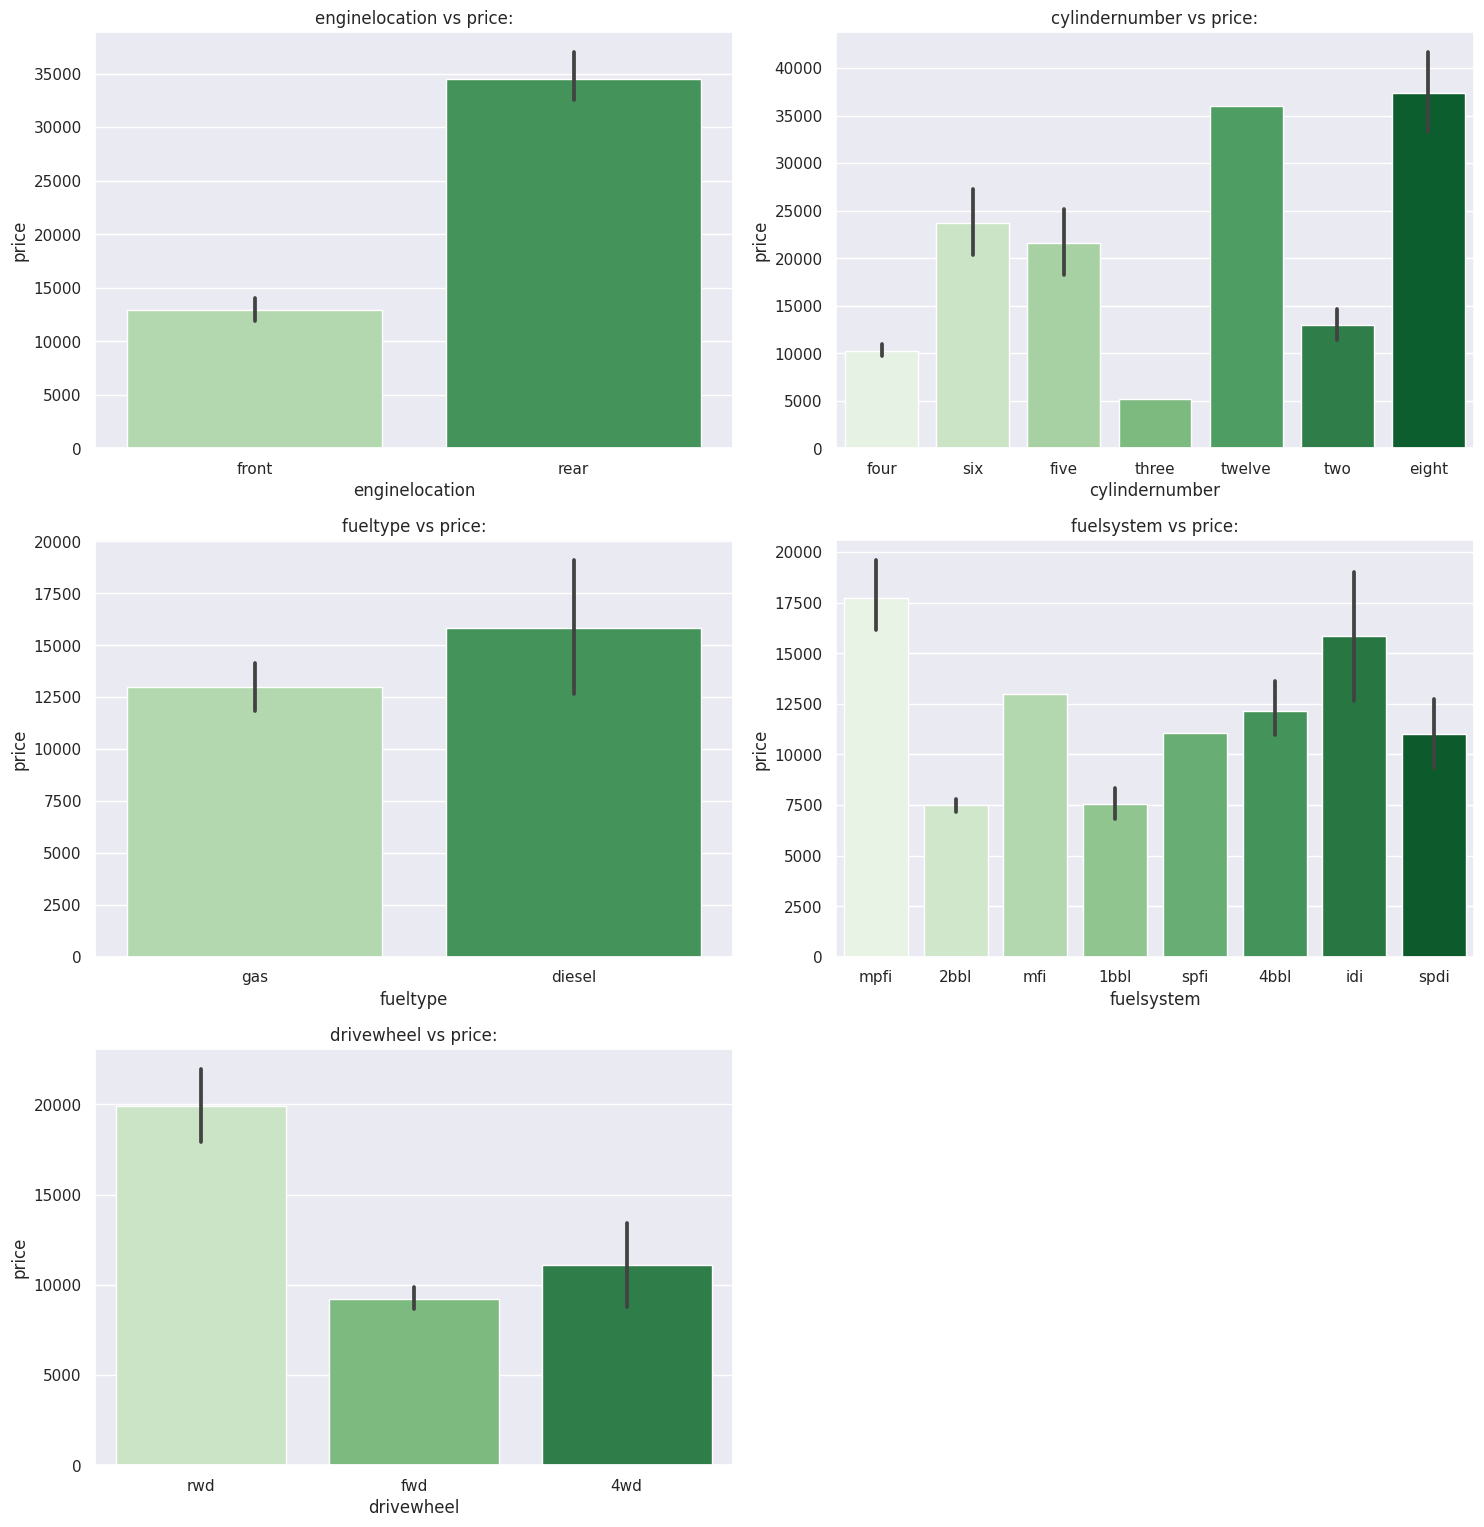

In [88]:
def plot_func(a,f):
    plt.subplot(4,2,(f))
    plt.title(a+" vs price:")
    sns.barplot(x=df[a], y=df.price, palette=("Greens"))

plt.figure(figsize=(15,20))

plot_func("enginelocation", 1)
plot_func("cylindernumber", 2)
plot_func("fueltype", 3)
plot_func("fuelsystem", 4)
plot_func("drivewheel", 5)
plt.tight_layout()

1. MPFI has highest price range followed by IDI.
2. RWD costs the most.
3. 8 cylinder engine costs the most followed by 12.
4. Rear engines cost more than front engine.

#**EDA numerical data:**

In [89]:
#Numerical data:
num = df.select_dtypes(exclude=['object']).columns.tolist()
print(num)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


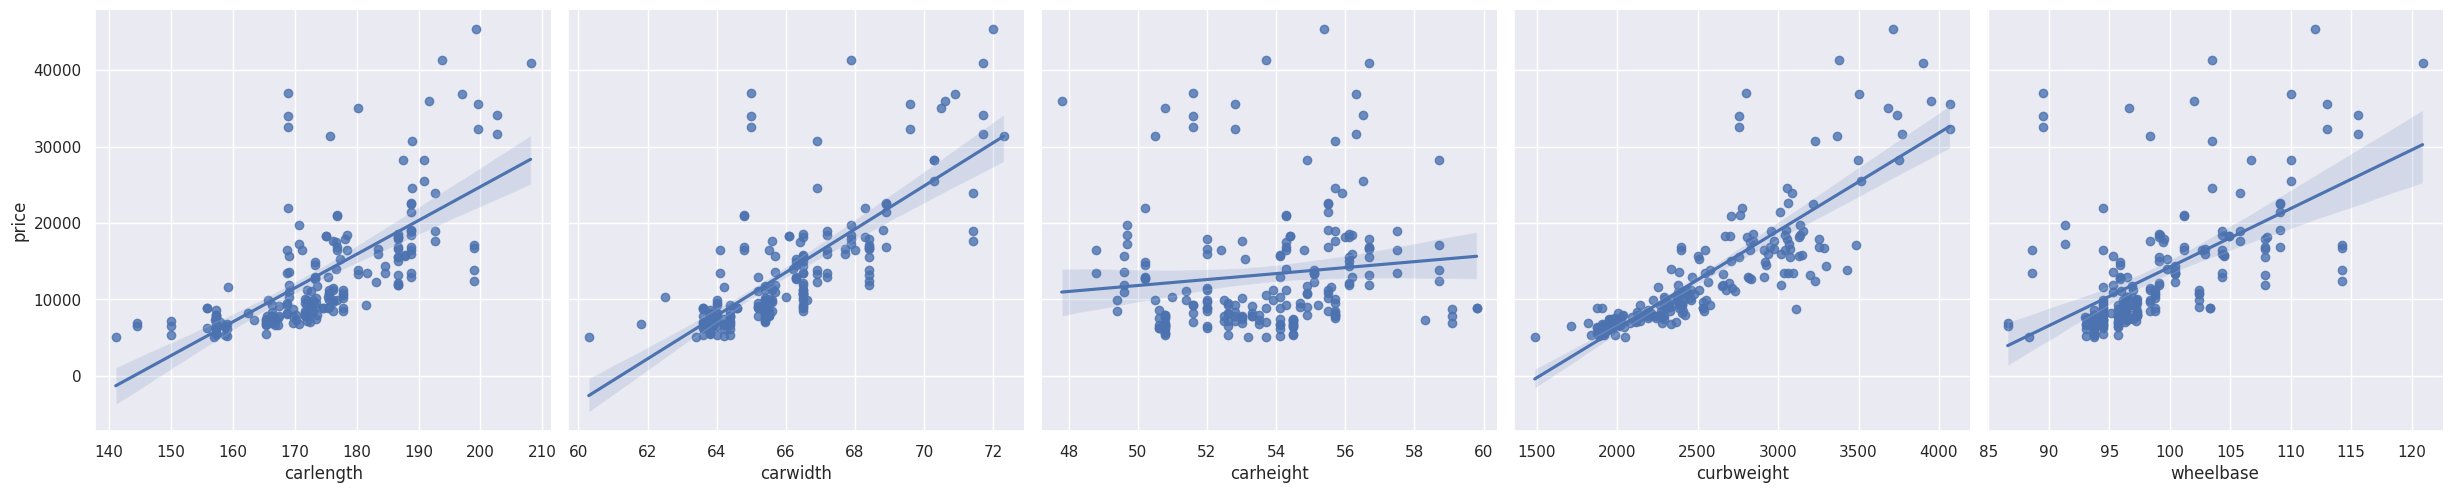

In [90]:
#Using sns pairplot for multiple plots:
def multiple(a,b,c,d,e):
    sns.pairplot(df, x_vars=[a,b,c,d,e], y_vars="price",size=5, aspect=1, kind="reg")
    plt.show()
multiple("carlength", "carwidth", "carheight", "curbweight", "wheelbase")

1. Car length and width have a positive correlation with price.
2. Car height doesn't display any correlation.
3. Curb weight and wheelbase also display positive correlation with price.
4. Most high end expensive price seem to have higher weight and larger dimensions.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


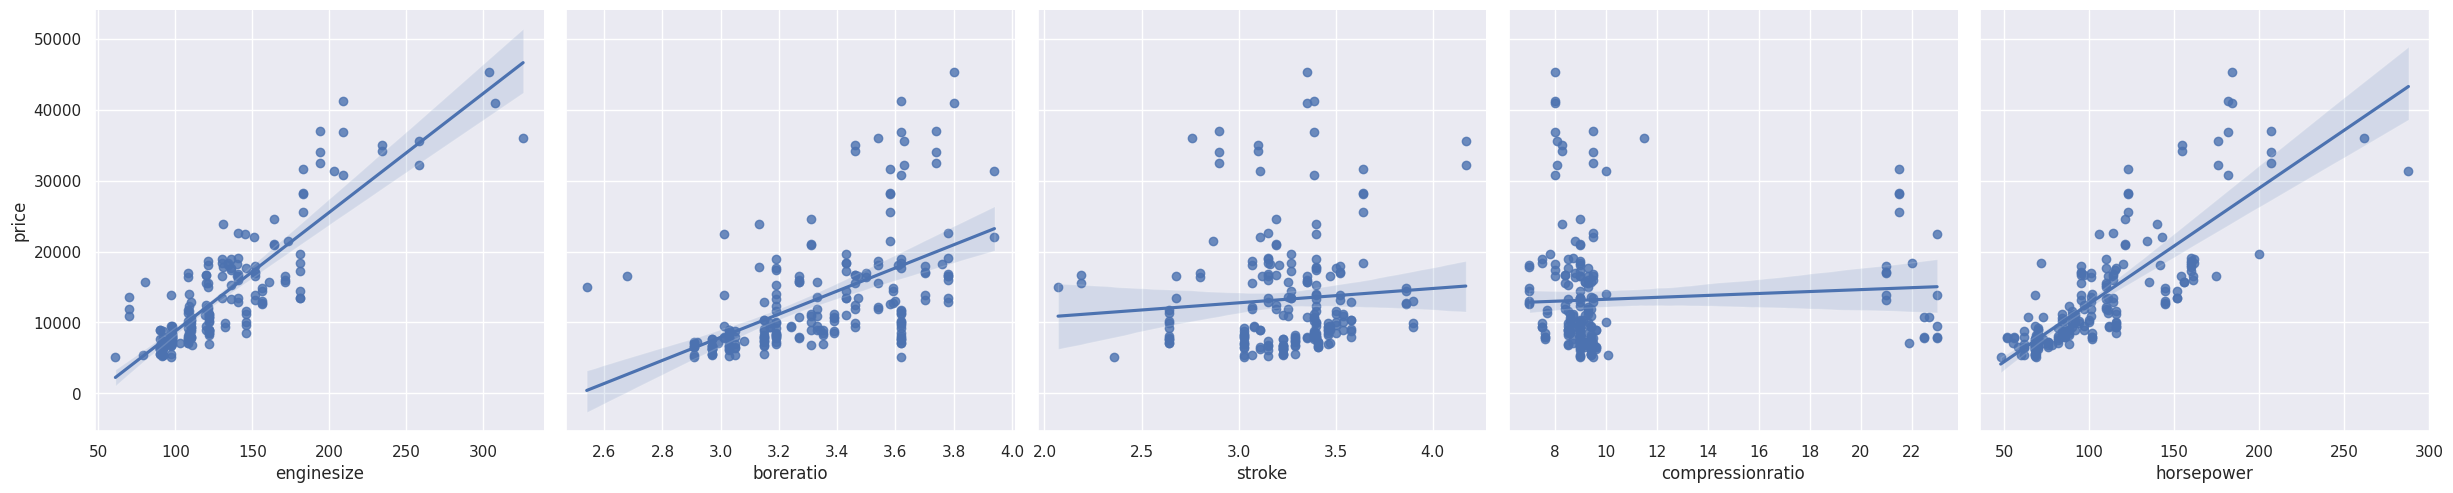

In [91]:
multiple("enginesize", "boreratio", "stroke", "compressionratio", "horsepower")

1. Engine size and horsepower has a positive correlation with price.
2. Bore ratio has a positive but weaker correlation with price.
3. Stroke and compression ratio has no correlation.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


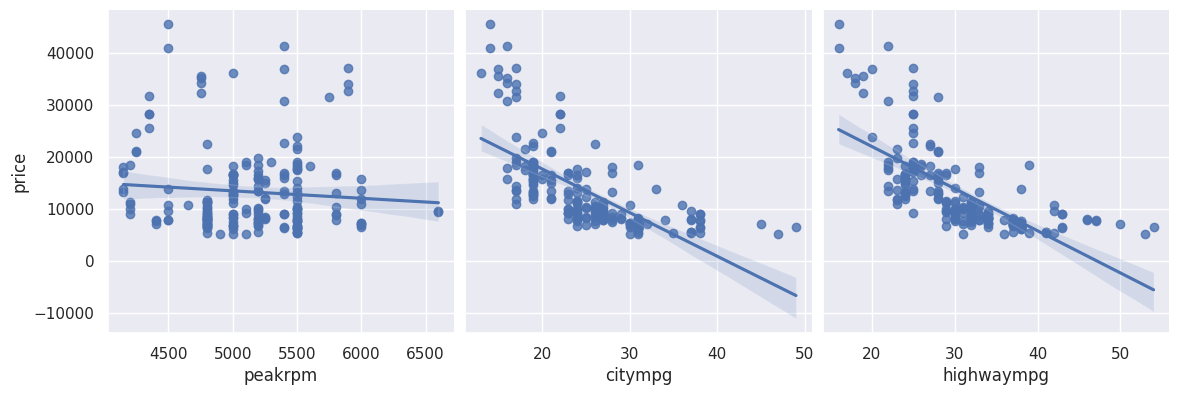

In [92]:
def multiple2(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars="price",size=4, aspect=1, kind="reg")
    plt.show()
multiple2("peakrpm", "citympg", "highwaympg")

1. City and highway mpg have a negative correlation with price.
2. Peak rpm has little to no correlation with price.

#**New features:**
Deriving new features to simplify the dataset for further use.

In [167]:
conditions = [
    (df["price"] <= 10000),
    (df["price"] > 10000) & (df["price"] <= 30000),
    (df["price"] > 30000)
]

# Define the corresponding labels for each price range:
labels = ["budget", "medium", "highend"]


# Initialize the 'range' column with missing values:
df["range"] = pd.Series(pd.NA)
# Converting 'range' column to an ordered categorical column:
df["range"] = pd.Series(pd.Categorical(pd.NA, categories=labels, ordered=True))

# Using np.select() to create the new 'range' column based on the conditions and labels:
# Assign the labels based on the conditions:
df["range"] = pd.Series(np.select(conditions, labels, default=pd.NA), dtype='category')

<ipython-input-167-78ecd490a50a>:14: FutureWarning: Allowing scalars in the Categorical constructor is deprecated and will raise in a future version.  Use `[value]` instead
  df["range"] = pd.Series(pd.Categorical(pd.NA, categories=labels, ordered=True))


In [128]:
print(df["range"].value_counts())

budget     100
medium      90
highend     15
Name: range, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


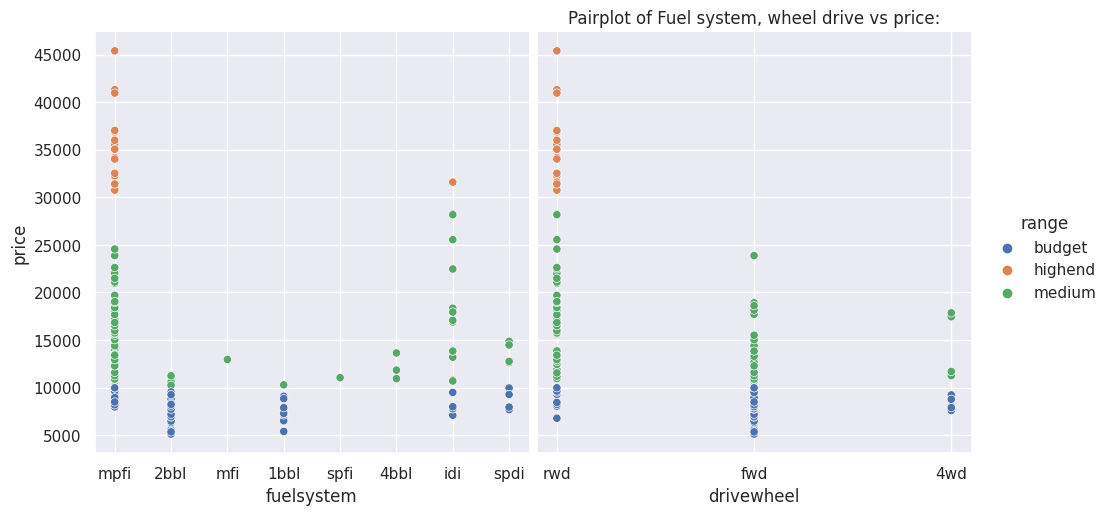

In [95]:
sns.pairplot(data = df, x_vars = ["fuelsystem", "drivewheel"], y_vars = "price", hue = "range", size = 5, aspect = 1, kind = "scatter")
plt.title("Pairplot of Fuel system, wheel drive vs price:")
plt.show()

Highend cars have MPFI fuel systems and RWD drive.

<ipython-input-132-e76e8a226184>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

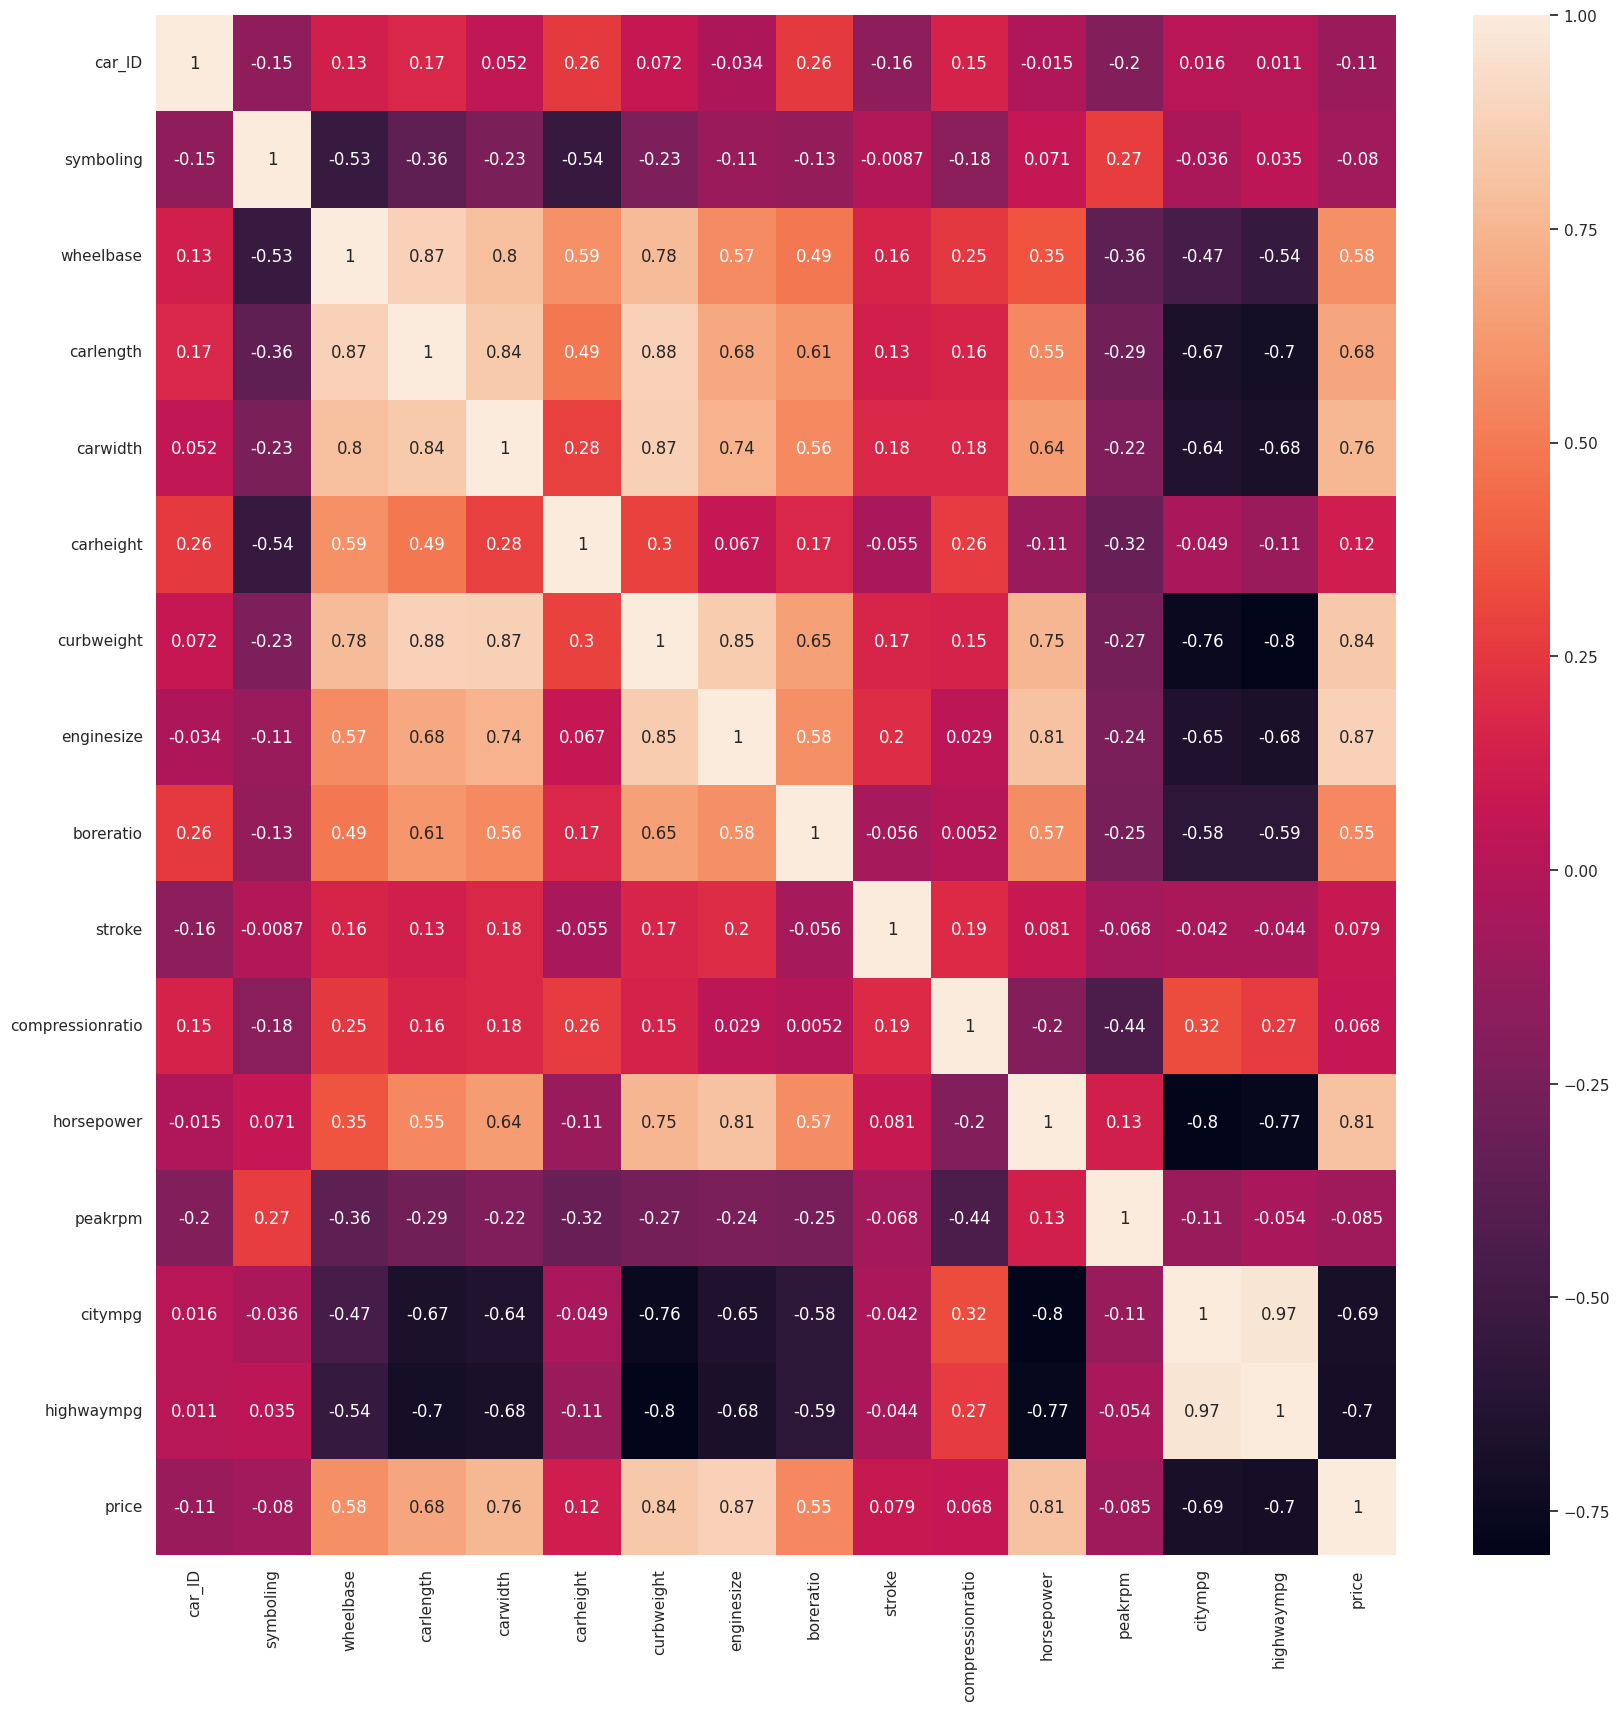

In [132]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)

#**Data preparation:**

In [170]:
sig_column = ["price","range", "enginetype", "fueltype", "aspiration", "carbody", "cylindernumber", "drivewheel",
              "wheelbase", "curbweight", "enginesize", "boreratio", "horsepower", "citympg", "highwaympg", "carlength", "carwidth"]

In [171]:
df = df[sig_column]

#**Dummy variables:**

In [172]:
sig_column_dum = ["fueltype","aspiration","carbody","drivewheel","enginetype", "cylindernumber", "range"]

In [173]:
dummy_df = pd.get_dummies(df[sig_column_dum], drop_first = True)
dummy_df.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,range_highend,range_medium
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [174]:
dummy_df.shape

(205, 22)

In [175]:
df = pd.concat([df, dummy_df], axis = 1)

In [176]:
# Drop the original cat variables as dummies are already created
df.drop( sig_column_dum, axis = 1, inplace = True)
df.shape

(205, 32)

In [177]:
df.head(2)

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,range_highend,range_medium
0,13495.0,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,0,0,0,1,0,0,0,0,0,1
1,16500.0,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,0,0,0,1,0,0,0,0,0,1


#**Train Test Split:**

In [281]:
from sklearn.model_selection import train_test_split
#Train is 70%, test is 30%:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [185]:
df_train.head(2)

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,range_highend,range_medium
122,7609.0,93.7,2191,98,2.97,68,31,38,167.3,63.8,...,0,0,0,1,0,0,0,0,0,0
125,22018.0,94.5,2778,151,3.94,143,19,27,168.9,68.3,...,0,0,0,1,0,0,0,0,0,1


#**Feature scaling:**

In [282]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the features (X) to calculate the mean and standard deviation
col = ["wheelbase", "carlength", "carwidth", "curbweight", "enginesize",
       "boreratio", "horsepower", "citympg", "highwaympg", "price"]

df_train[col] = scaler.fit_transform(df_train[col])

scaler.fit(x)
x_scaled = scaler.transform(x)

In [187]:
df_train.head(2)

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,range_highend,range_medium
122,-0.700201,-0.811836,-0.642128,-0.660242,-1.297329,-0.872898,0.839773,1.025419,-0.487238,-0.924500,...,0,0,0,1,0,0,0,0,0,0
125,1.151929,-0.677177,0.439415,0.637806,2.432256,1.021826,-0.957048,-0.557490,-0.359789,1.114978,...,0,0,0,1,0,0,0,0,0,1


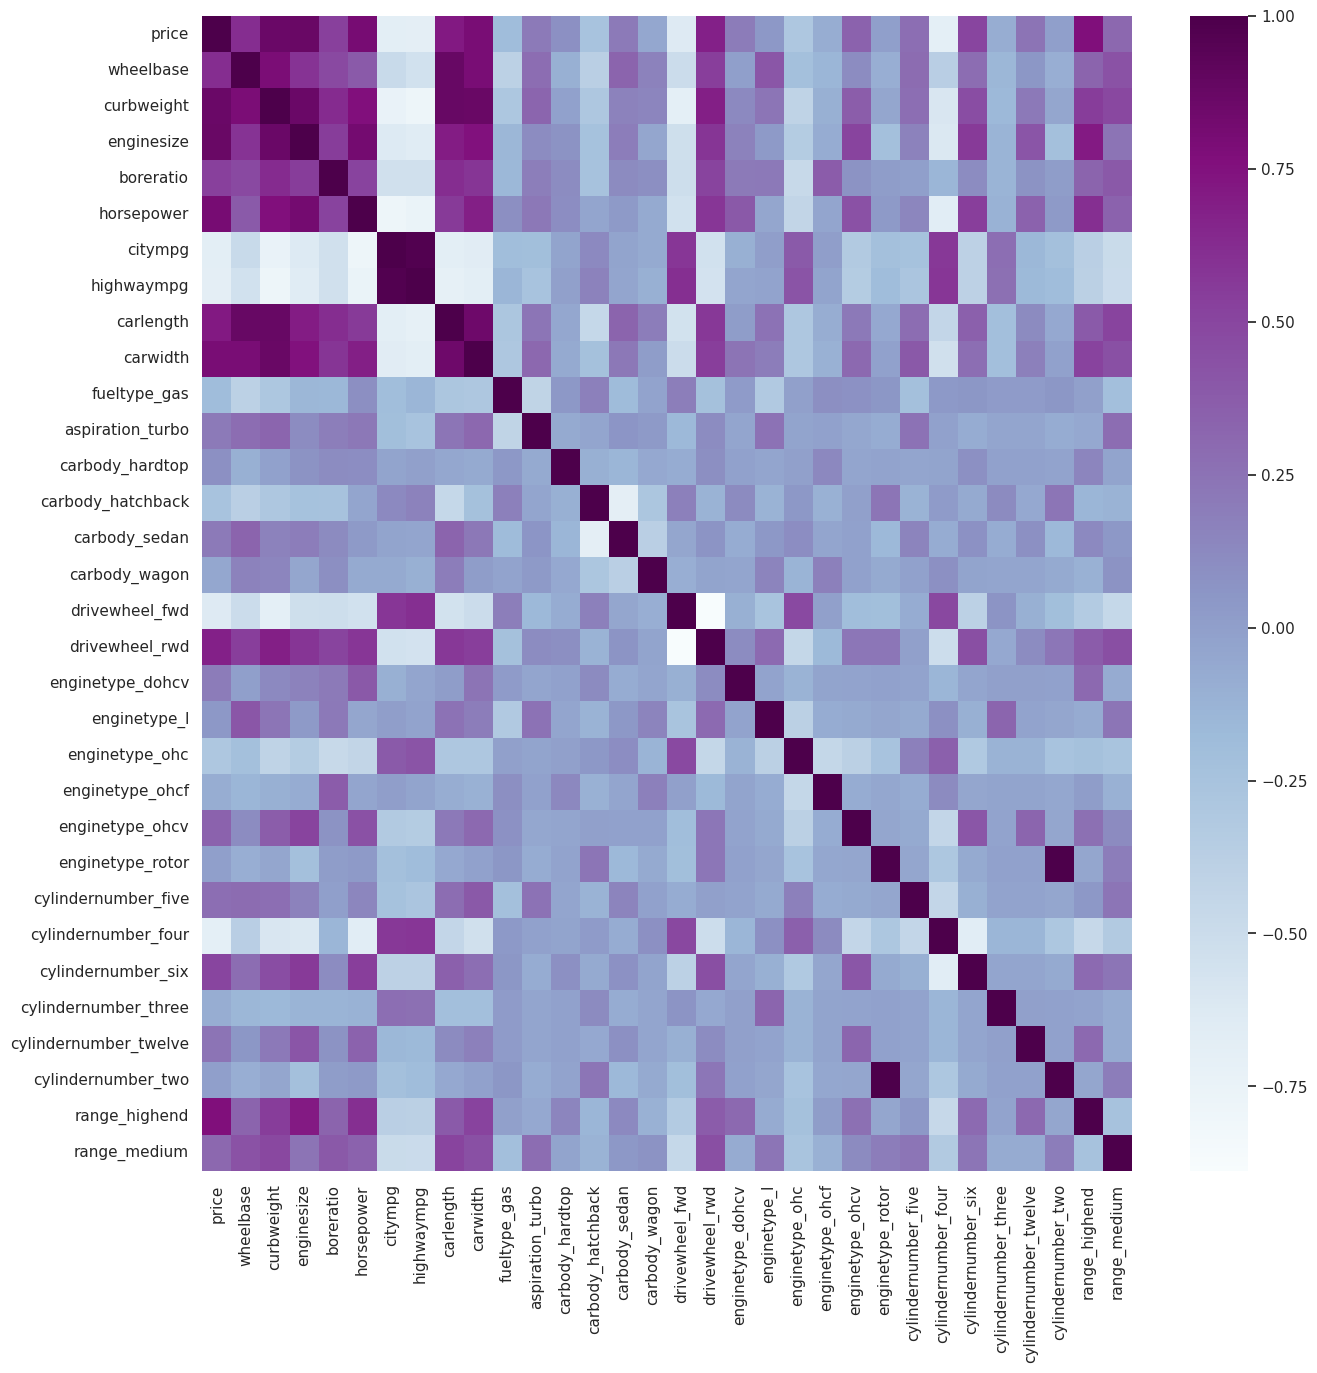

In [191]:
plt.figure(figsize = (15, 15))
sns.heatmap(df_train.corr(), cmap="BuPu")
plt.show()

#**Model:**

In [253]:
x_train = df_train
y_train = df_train.pop("price")

In [254]:
x_train_1 = x_train[["horsepower", "curbweight", "enginesize"]]

In [255]:
x_train_1a = sm.add_constant(x_train_1)
lr_1 = sm.OLS(y_train, x_train_1a).fit()
lr_1.params

const         1.457168e-16
horsepower    2.288518e-01
curbweight    3.938176e-01
enginesize    3.400406e-01
dtype: float64

In [256]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           2.16e-51
Time:                        05:57:40   Log-Likelihood:                -80.681
No. Observations:                 143   AIC:                             169.4
Df Residuals:                     139   BIC:                             181.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.457e-16      0.036   4.04e-15      1.0

In [257]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [258]:
#Variables in support:
support = x_train.columns[rfe.support_]
support

Index(['horsepower', 'carwidth', 'fueltype_gas', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_rotor',
       'cylindernumber_four', 'cylindernumber_two', 'range_highend',
       'range_medium'],
      dtype='object')

In [259]:
x_train_rfe = x_train[support]

In [ ]:
#Building model:
x_train_rfec = sm.add_constant(x_train_rfe)
lm_rfe = sm.OLS(y_train,x_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

In [261]:
def check_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [262]:
check_vif(x_train_rfe)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
10,enginetype_rotor,inf
12,cylindernumber_two,inf
2,fueltype_gas,12.46
5,carbody_sedan,8.39
11,cylindernumber_four,7.86
4,carbody_hatchback,6.54
0,horsepower,5.02
14,range_medium,4.83
9,enginetype_ohc,4.72
13,range_highend,3.58


In [265]:
#Dropping carbody_wagon as p value is > 0.05:
x_train_rfe1 = x_train_rfe.drop("carbody_wagon", 1,)

#Building a second model:
X_train_rfe1c = sm.add_constant(x_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     161.6
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           4.35e-73
Time:                        06:00:38   Log-Likelihood:                0.85919
No. Observations:                 143   AIC:                             26.28
Df Residuals:                     129   BIC:                             67.76
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0296    

<ipython-input-265-ea7df1355afc>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train_rfe1 = x_train_rfe.drop("carbody_wagon", 1,)


In [266]:
check_vif(x_train_rfe1)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
9,enginetype_rotor,inf
11,cylindernumber_two,inf
2,fueltype_gas,9.10
10,cylindernumber_four,7.25
0,horsepower,4.90
13,range_medium,4.72
8,enginetype_ohc,4.57
5,carbody_sedan,3.64
12,range_highend,3.56
1,carwidth,3.39


In [267]:
#Dropping carbody_sedan as p value is > 0.05:
x_train_rfe2 = x_train_rfe1.drop("carbody_sedan", 1,)

#Building a third model:
X_train_rfe2c = sm.add_constant(x_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     174.7
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           5.90e-74
Time:                        06:01:35   Log-Likelihood:                0.18357
No. Observations:                 143   AIC:                             25.63
Df Residuals:                     130   BIC:                             64.15
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0319    

<ipython-input-267-ac19fa201537>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train_rfe2 = x_train_rfe1.drop("carbody_sedan", 1,)


In [268]:
check_vif(x_train_rfe2)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
8,enginetype_rotor,inf
10,cylindernumber_two,inf
2,fueltype_gas,8.37
9,cylindernumber_four,7.19
0,horsepower,4.88
12,range_medium,4.70
7,enginetype_ohc,4.02
11,range_highend,3.52
1,carwidth,3.36
5,drivewheel_rwd,3.04


In [269]:
#Dropping carbody_hardtop as p value is > 0.05:
x_train_rfe3 = x_train_rfe2.drop("carbody_hardtop", 1,)

#Building a fourth model:
X_train_rfe3c = sm.add_constant(x_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     190.8
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           6.16e-75
Time:                        06:03:26   Log-Likelihood:               -0.24875
No. Observations:                 143   AIC:                             24.50
Df Residuals:                     131   BIC:                             60.05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0289    

<ipython-input-269-356300c3b52f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train_rfe3 = x_train_rfe2.drop("carbody_hardtop", 1,)


In [270]:
check_vif(x_train_rfe3)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
7,enginetype_rotor,inf
9,cylindernumber_two,inf
2,fueltype_gas,8.31
8,cylindernumber_four,7.16
0,horsepower,4.79
11,range_medium,4.68
6,enginetype_ohc,4.00
10,range_highend,3.44
1,carwidth,3.12
4,drivewheel_rwd,3.03


In [271]:
#Dropping enginetype_rotor as vif is > 5:
x_train_rfe4 = x_train_rfe3.drop("enginetype_rotor", 1,)

#Building a fifth model:
X_train_rfe4c = sm.add_constant(x_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     190.8
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           6.16e-75
Time:                        06:06:47   Log-Likelihood:               -0.24875
No. Observations:                 143   AIC:                             24.50
Df Residuals:                     131   BIC:                             60.05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0289    

<ipython-input-271-c44b6f9123fc>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train_rfe4 = x_train_rfe3.drop("enginetype_rotor", 1,)


In [272]:
check_vif(x_train_rfe4)

,Features,VIF
2,fueltype_gas,8.31
7,cylindernumber_four,7.16
0,horsepower,4.79
10,range_medium,4.68
6,enginetype_ohc,4.00
9,range_highend,3.44
1,carwidth,3.12
4,drivewheel_rwd,3.03
3,carbody_hatchback,1.83
8,cylindernumber_two,1.50


In [273]:
#Dropping fueltype_gas as vif is > 5:
x_train_rfe5 = x_train_rfe4.drop("fueltype_gas", 1,)

#Building a sixth model:
X_train_rfe5c = sm.add_constant(x_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     200.9
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           9.82e-75
Time:                        06:08:25   Log-Likelihood:                -3.6968
No. Observations:                 143   AIC:                             29.39
Df Residuals:                     132   BIC:                             61.98
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2561    

<ipython-input-273-ddf4f3b70d81>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train_rfe5 = x_train_rfe4.drop("fueltype_gas", 1,)


In [275]:
check_vif(x_train_rfe5)

,Features,VIF
6,cylindernumber_four,4.71
9,range_medium,4.37
0,horsepower,4.10
5,enginetype_ohc,3.51
8,range_highend,3.17
3,drivewheel_rwd,3.03
1,carwidth,2.73
2,carbody_hatchback,1.78
7,cylindernumber_two,1.42
4,enginetype_dohcv,1.33


#**Prediction:**

In [283]:
#Predict:
y_train_price = lm_rfe5.predict(X_train_rfe5c)

<ipython-input-284-4532b8c8c8e1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 10)


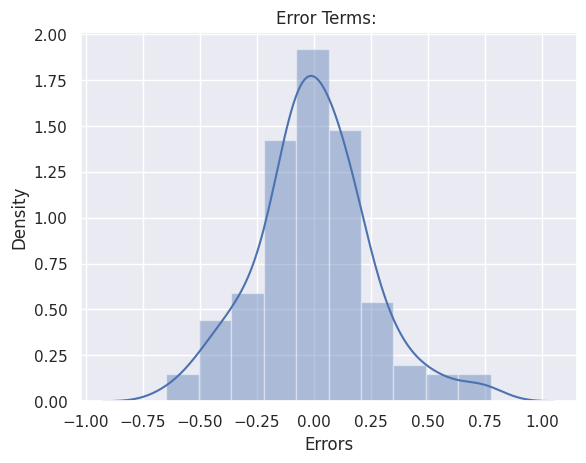

In [284]:
# Plot the histogram of the error terms
sns.distplot((y_train - y_train_price), bins = 10)
plt.title("Error Terms: ")
plt.xlabel("Errors")
plt.show()

In [286]:
df_test[col] = scaler.fit_transform(df_test[col])
df_test.shape

(62, 32)

In [287]:
y_test = df_test.pop('price')
X_test = df_test

In [288]:
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_rfe5c.columns]

In [289]:
# Making predictions:
y_pred = lm_rfe5.predict(X_test_new)

Text(0, 0.5, 'y_pred')

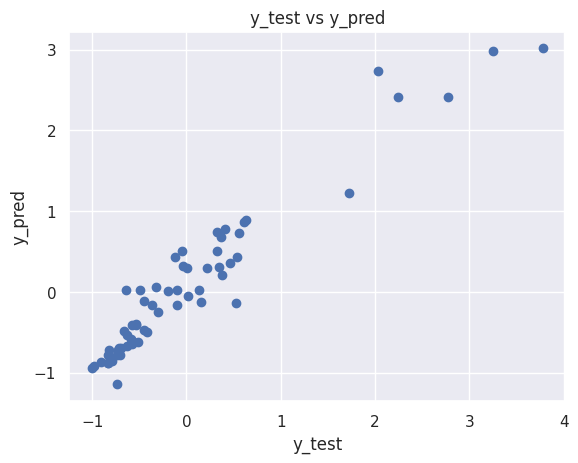

In [291]:
plt.scatter(y_test,y_pred)
plt.title("y_test vs y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [294]:
#R squared:
r2_score(y_test, y_pred)

0.9191704691709173

**price** = - 0.2561 + 0.1791 × *horsepower* + 0.1984 × *carwidth* - 0.1365 ×  *carbody_hatchback* + 0.4103 × *drivewheel_rwd* - 0.9920 × *enginetype_dohcv* + 0.2463 × *enginetype_ohc* - 0.3650 × *cylindernumber_four* - 0.3753 × *cylindernumber_two* + 1.9125 × *range_highend* + 0.3341 × *range_medium*